In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

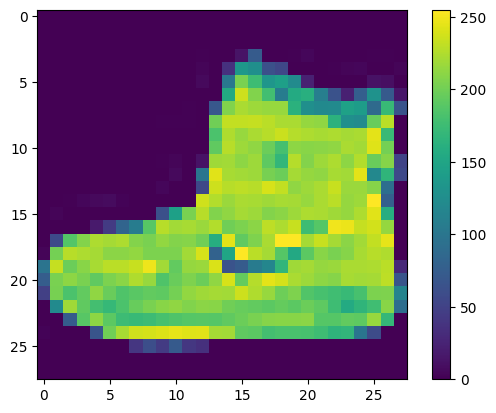

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

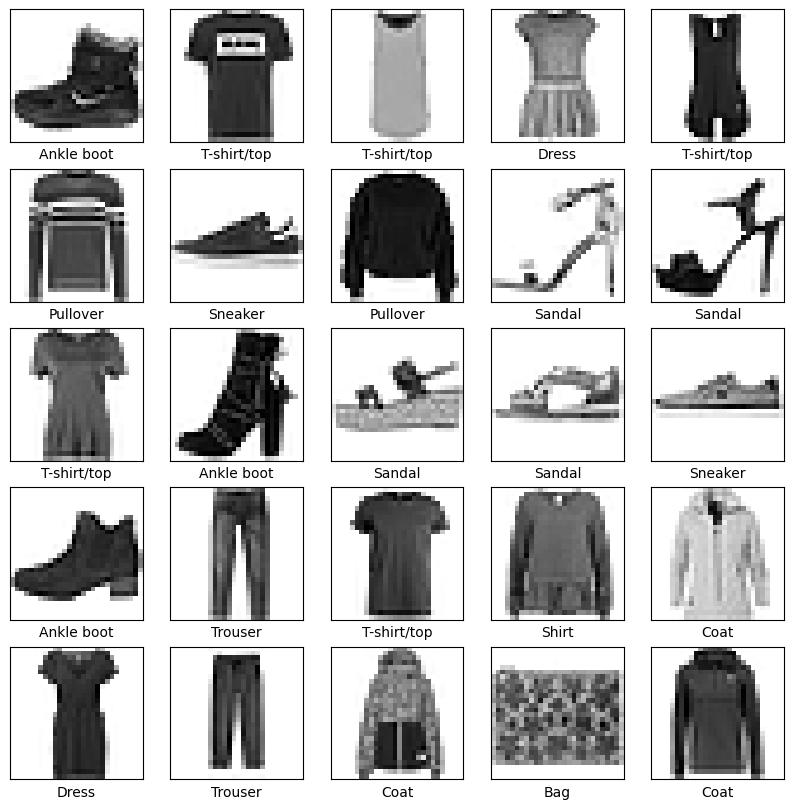

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Also, the neurons in the final layer must have the softmax activation function why?
   * The softmax activation function is commonly used in the last layer of a neural network for multi-class classification tasks because it converts the network's raw output scores into probability distributions over multiple classes, making it suitable for selecting the most likely class.

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5040 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3756 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2920 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2664 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2553 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2452 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3367 - accuracy: 0.8794 - 723ms/epoch - 2ms/step

Test accuracy: 0.8794000148773193


### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [18]:
predictions[0]

array([6.5262992e-07, 3.2270120e-12, 3.0727170e-09, 8.3009728e-13,
       1.4177022e-08, 3.0711133e-04, 4.4534065e-07, 5.9051448e-03,
       5.3633080e-08, 9.9378669e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [19]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [20]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

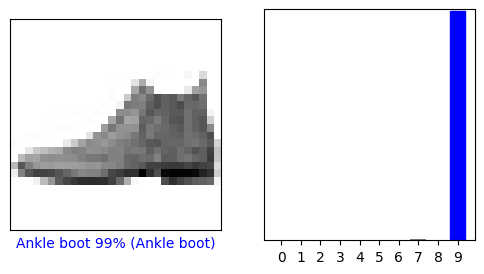

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

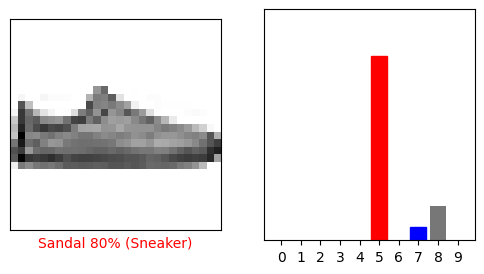

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

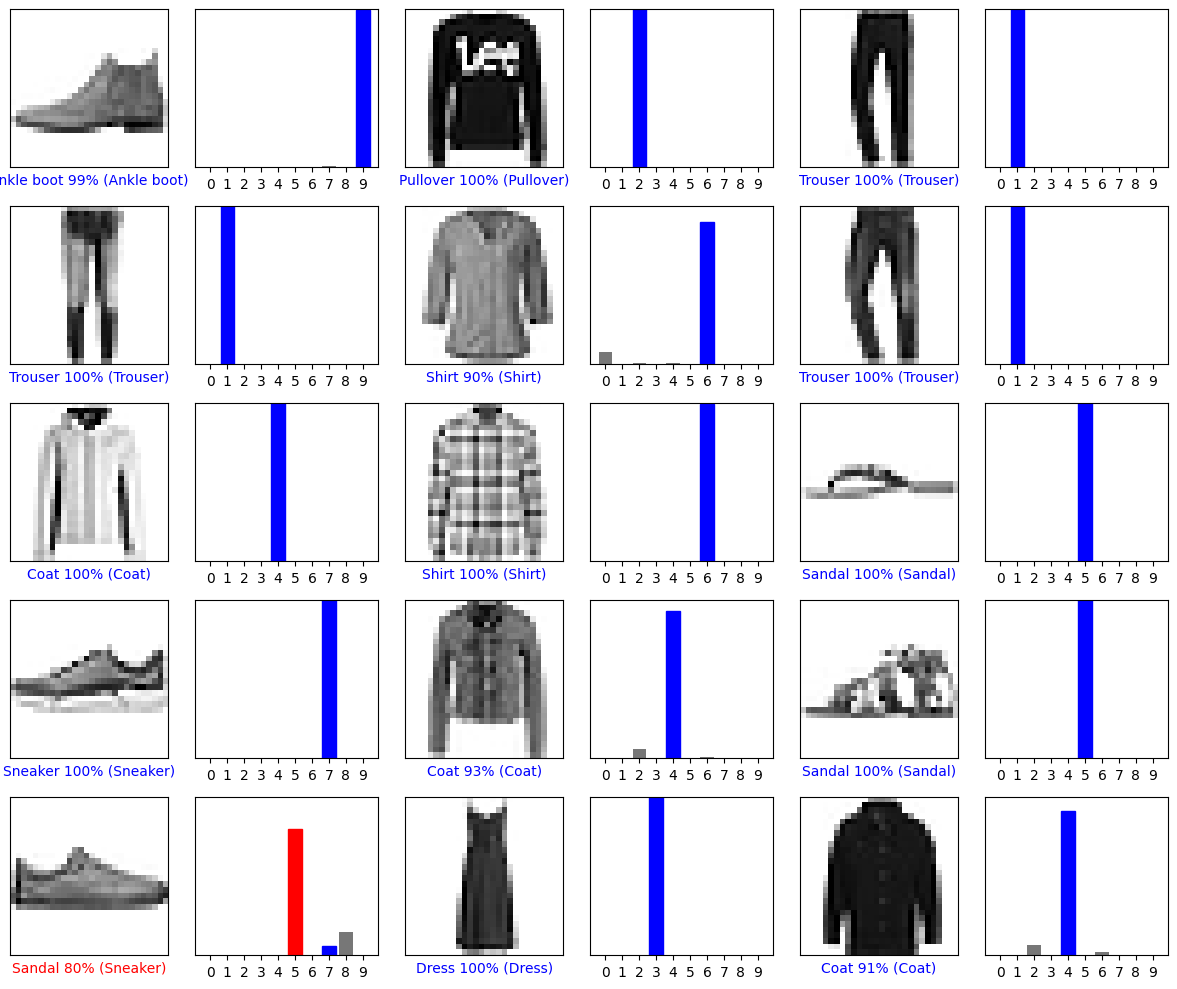

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 28ms/step
[[1.4390426e-06 1.8720051e-15 9.9973279e-01 4.4900734e-15 2.5219063e-04
  7.3652645e-14 1.3579692e-05 9.5061682e-16 3.1278577e-11 1.1967764e-12]]


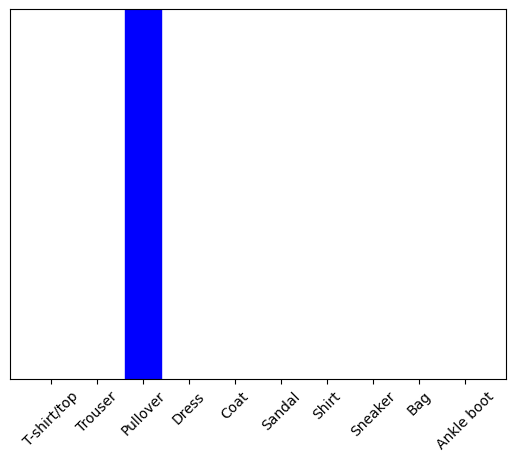

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [29]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).

#### i. Use activation = “softmax” in the last layer, or
#### ii. Use no activation in the last layer but set the option from_logit=True in
your cross-entropy loss function as follows. In this case, the model outputs
the raw scores. The option from_logits=True tells TensorFlow to apply
softmax to the output before computing the cross-entropy loss:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [30]:
# softmax in last layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Compile the model with the SparseCategoricalCrossentropy loss function
model_2.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

## 5. Split the training images into train and validation images. Use 50k images for training and 10k
images for validation. We will use the validation set to tune the model. (1 pts)

In [32]:
# Split the training data into training and validation sets
train_images, validation_images = train_images[:50000], train_images[50000:]
train_labels, validation_labels = train_labels[:50000], train_labels[50000:]

In [33]:
train_images.shape, validation_images.shape, train_labels.shape, validation_labels.shape

((50000, 28, 28), (10000, 28, 28), (50000,), (10000,))

## 6. Use the model from the TensorFlow tutorial starting point notebook as a base model.
Then, pass the validation data to the model.fit method as follows:
model.fit(train_images, train_labels, validation_data=(your_validation_
images, your_validation_labels),epochs=10)

In [34]:
history_2 = model_2.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5123 - accuracy: 0.8206 - val_loss: 0.4399 - val_accuracy: 0.8452
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3866 - accuracy: 0.8615 - val_loss: 0.3990 - val_accuracy: 0.8573
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3427 - accuracy: 0.8742 - val_loss: 0.3981 - val_accuracy: 0.8504
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3203 - accuracy: 0.8830 - val_loss: 0.3473 - val_accuracy: 0.8710
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8904 - val_loss: 0.3609 - val_accuracy: 0.8746
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2883 - accuracy: 0.8936 - val_loss: 0.3397 - val_accuracy: 0.8801
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2737 - accuracy: 0.8974 - val_loss: 0.3441 - val_accuracy:

### Plot the learning curves

In [35]:
def plot_curves(history):
  # Plot accuracy values
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  # Plot loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.tight_layout()
  return plt.show()

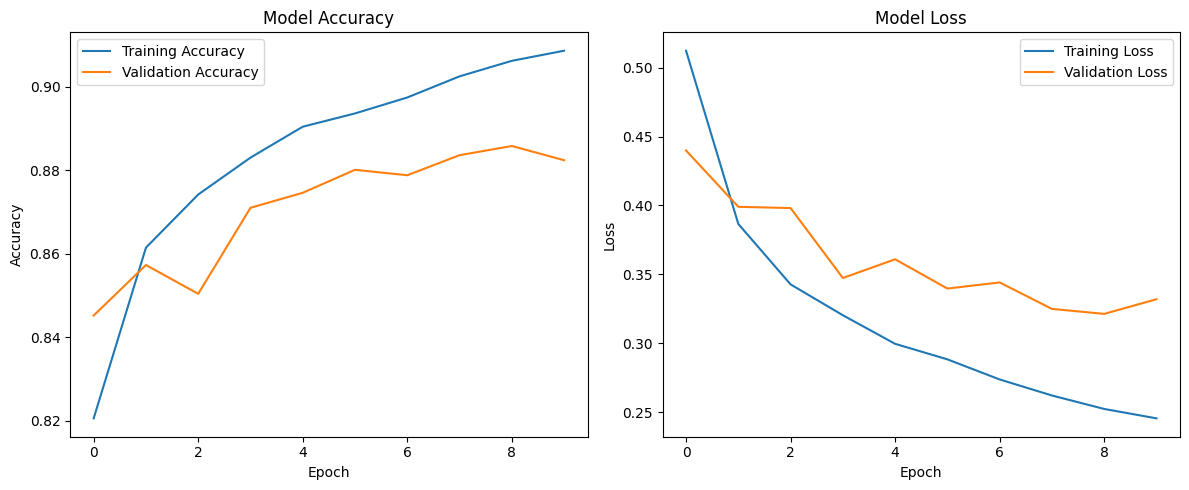

In [36]:
# Plot model
plot_model = plot_curves(history_2)

###  Does your model overfit? Does the training and validation loss continue to decrease after the last epoch?

   * The training loss steadily decreases, indicating that the model is learning from the training data.
   * The training accuracy increases over the epochs, suggesting that the model is improving its ability to classify the training samples correctly.
   * The validation loss fluctuates but remains relatively stable over the epochs.
   * The validation accuracy also shows some fluctuations but maintains a consistent level.

**Based on these observations, it appears that the model is not overfitting. The training and validation performances are relatively consistent, and the model's accuracy on the validation set is comparable to the training accuracy.**

In [37]:
more_epochs = 5
history_more = model_2.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=more_epochs)

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2326 - accuracy: 0.9133 - val_loss: 0.3535 - val_accuracy: 0.8747
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2267 - accuracy: 0.9163 - val_loss: 0.3285 - val_accuracy: 0.8834
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2200 - accuracy: 0.9171 - val_loss: 0.3299 - val_accuracy: 0.8879
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2112 - accuracy: 0.9206 - val_loss: 0.3284 - val_accuracy: 0.8849
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2062 - accuracy: 0.9224 - val_loss: 0.3354 - val_accuracy: 0.8867


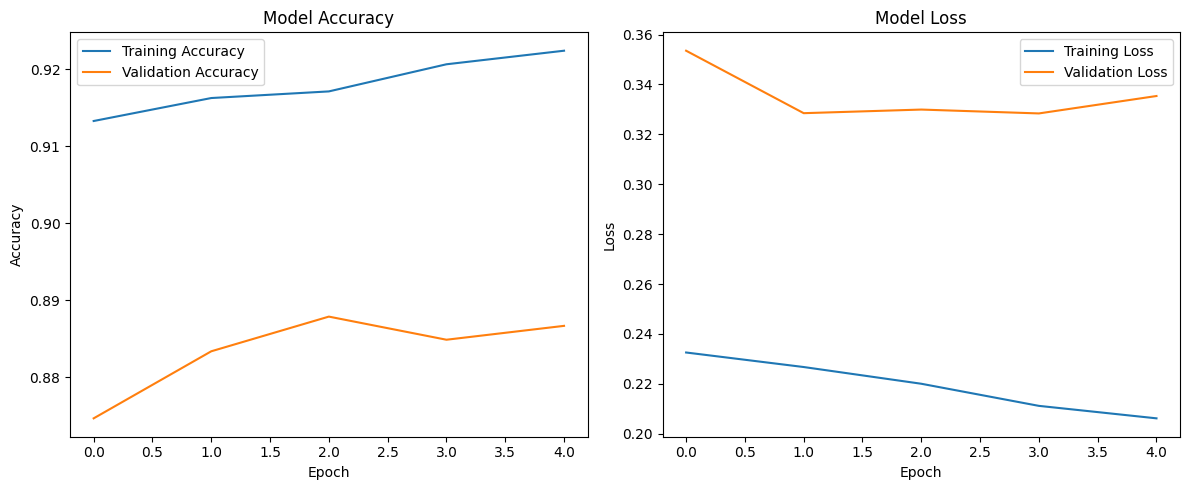

In [38]:
# Plot model
plot_model = plot_curves(history_more)

## 7. Try learning rate scheduling, SGD with momentum or Adam optimizers, and batch normalization. Make sure that you re-define the model each time to start over with random weights.

In [39]:
# re-define base model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Learning Rate Scheduling

In [40]:
# learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=1000, decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_3.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# model training
history_3 = model_3.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5287 - accuracy: 0.8117 - val_loss: 0.4426 - val_accuracy: 0.8465
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4136 - accuracy: 0.8512 - val_loss: 0.4338 - val_accuracy: 0.8482
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8621 - val_loss: 0.3962 - val_accuracy: 0.8625
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3480 - accuracy: 0.8727 - val_loss: 0.4093 - val_accuracy: 0.8470
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3294 - accuracy: 0.8773 - val_loss: 0.3904 - val_accuracy: 0.8654
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3118 - accuracy: 0.8843 - val_loss: 0.3772 - val_accuracy: 0.8715
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2946 - accuracy: 0.8904 - val_loss: 0.3661 - val_accuracy:

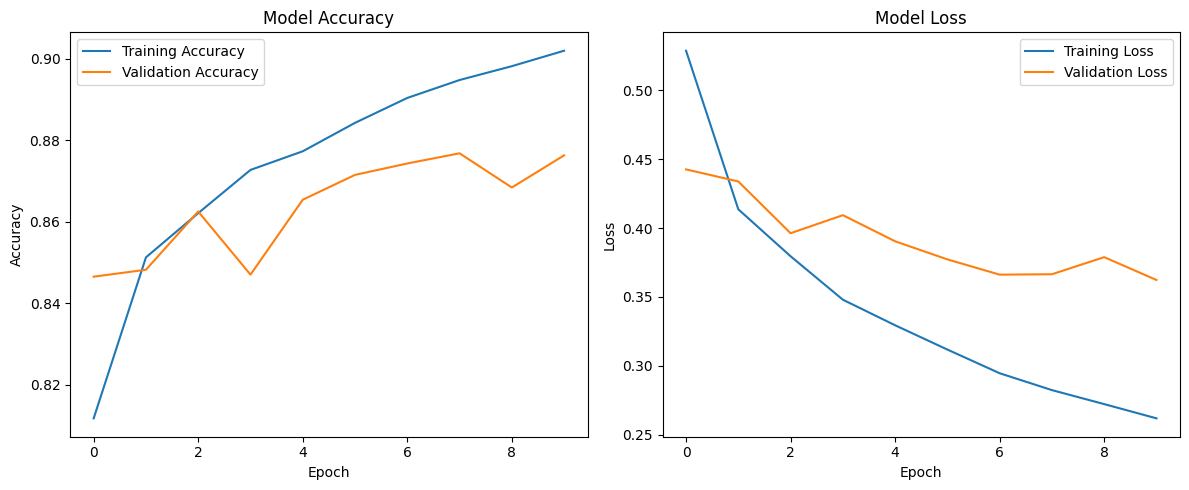

In [41]:
# Plot model
plot_model = plot_curves(history_3)

SGD with Momentum Optimizer:

In [42]:
# re-define base model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# SGD optimizer with momentum
sgd_optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model_4.compile(optimizer=sgd_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# model training
history_4 = model_4.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5453 - accuracy: 0.8085 - val_loss: 0.4469 - val_accuracy: 0.8431
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4104 - accuracy: 0.8516 - val_loss: 0.4010 - val_accuracy: 0.8597
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3678 - accuracy: 0.8669 - val_loss: 0.3773 - val_accuracy: 0.8671
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.8757 - val_loss: 0.3823 - val_accuracy: 0.8632
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3253 - accuracy: 0.8811 - val_loss: 0.3393 - val_accuracy: 0.8786
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3085 - accuracy: 0.8869 - val_loss: 0.3426 - val_accuracy: 0.8777
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2983 - accuracy: 0.8880 - val_loss: 0.3604 - val_accuracy:

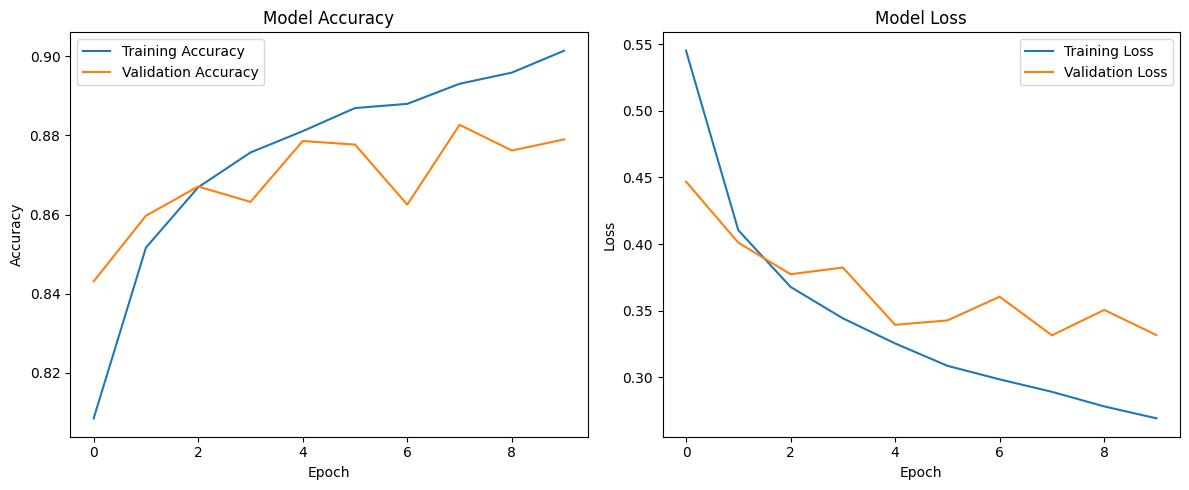

In [43]:
# Plot model
plot_model = plot_curves(history_4)

Adam Optimizer:

In [44]:
# re-define base model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_5.compile(optimizer=adam_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# model training
history_5 = model_5.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.7489 - accuracy: 0.7614 - val_loss: 0.5376 - val_accuracy: 0.8187
Epoch 2/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.4928 - accuracy: 0.8340 - val_loss: 0.4712 - val_accuracy: 0.8388
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4434 - accuracy: 0.8504 - val_loss: 0.4354 - val_accuracy: 0.8487
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8585 - val_loss: 0.4175 - val_accuracy: 0.8542
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3965 - accuracy: 0.8632 - val_loss: 0.4074 - val_accuracy: 0.8600
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3828 - accuracy: 0.8678 - val_loss: 0.3941 - val_accuracy: 0.8640
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3693 - accuracy: 0.8725 - val_loss: 0.3913 - val_accuracy

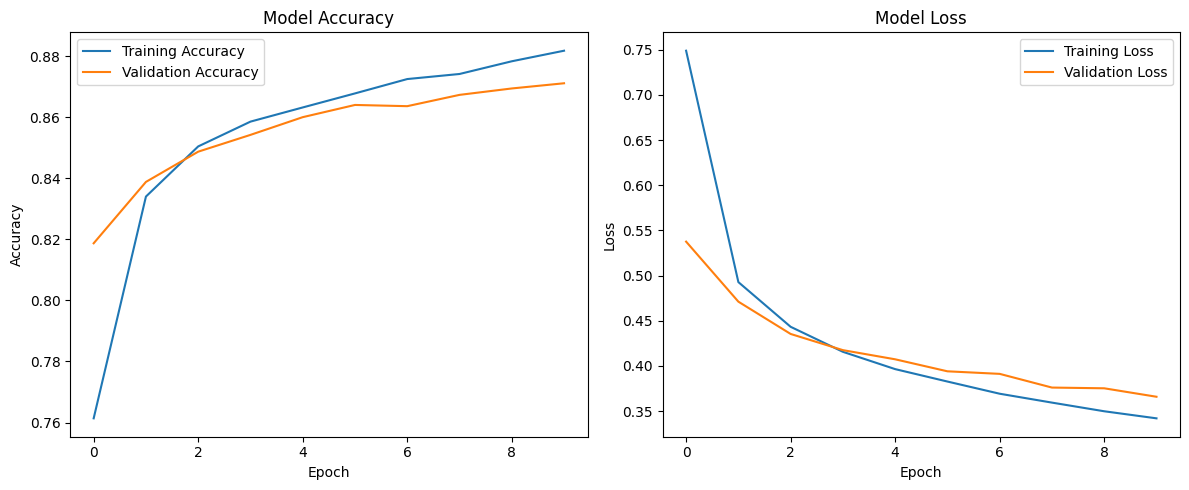

In [45]:
# Plot model
plot_model = plot_curves(history_5)

Batch Normalization:

In [46]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')])

# Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_6.compile(optimizer=adam_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# model training
history_6 = model_6.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.6313 - accuracy: 0.7828 - val_loss: 0.5043 - val_accuracy: 0.8288
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4892 - accuracy: 0.8328 - val_loss: 0.4614 - val_accuracy: 0.8386
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4647 - accuracy: 0.8399 - val_loss: 0.4623 - val_accuracy: 0.8368
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4480 - accuracy: 0.8459 - val_loss: 0.4430 - val_accuracy: 0.8480
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4399 - accuracy: 0.8486 - val_loss: 0.4631 - val_accuracy: 0.8386
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4320 - accuracy: 0.8504 - val_loss: 0.4561 - val_accuracy: 0.8397
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4264 - accuracy: 0.8525 - val_loss: 0.4459 - val_accuracy

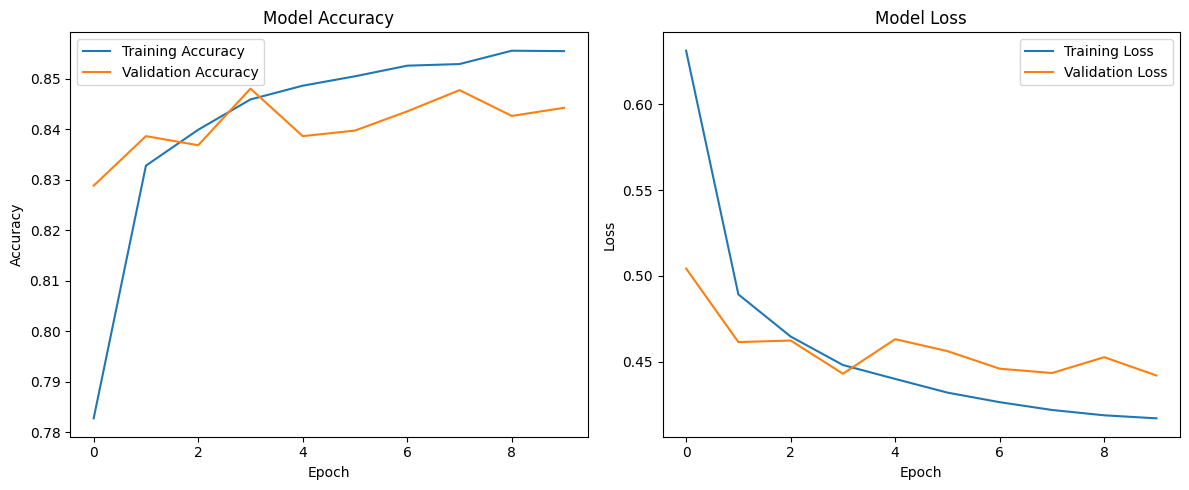

In [47]:
# Plot model
plot_model = plot_curves(history_6)

### Does applying any of these techniques to your model help improve the learning?
after training model with Adam optimizer learning_rate=0.0001 loss of validation data improve.

## 8. As we learned in the lecture, the general advice for designing a neural network model is to reduce the training loss as much as possible until the model starts to overfit. Then, at that point, start regularizing your model. If your model is not overfitting, add more layers to reduce the training loss further until your model starts overfitting.

## 9. Regularize your model using early stopping, dropout, and/or weight decay.

In [48]:
# Add dropout layers in base model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [49]:
# Define early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)
model_7.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Train the model
history_7 = model_7.fit(train_images, train_labels,
                    validation_data=(validation_images, validation_labels),
                    epochs=30, callbacks=[early_stopping_callback])

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6420 - accuracy: 0.7735 - val_loss: 0.4413 - val_accuracy: 0.8375
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4838 - accuracy: 0.8246 - val_loss: 0.3937 - val_accuracy: 0.8538
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4531 - accuracy: 0.8373 - val_loss: 0.3795 - val_accuracy: 0.8600
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4248 - accuracy: 0.8458 - val_loss: 0.3781 - val_accuracy: 0.8616
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4156 - accuracy: 0.8478 - val_loss: 0.3643 - val_accuracy: 0.8670
Epoch 6/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4004 - accuracy: 0.8531 - val_loss: 0.3648 - val_accuracy: 0.8644
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3922 - accuracy: 0.8558 - val_loss: 0.3596 - val_accuracy:

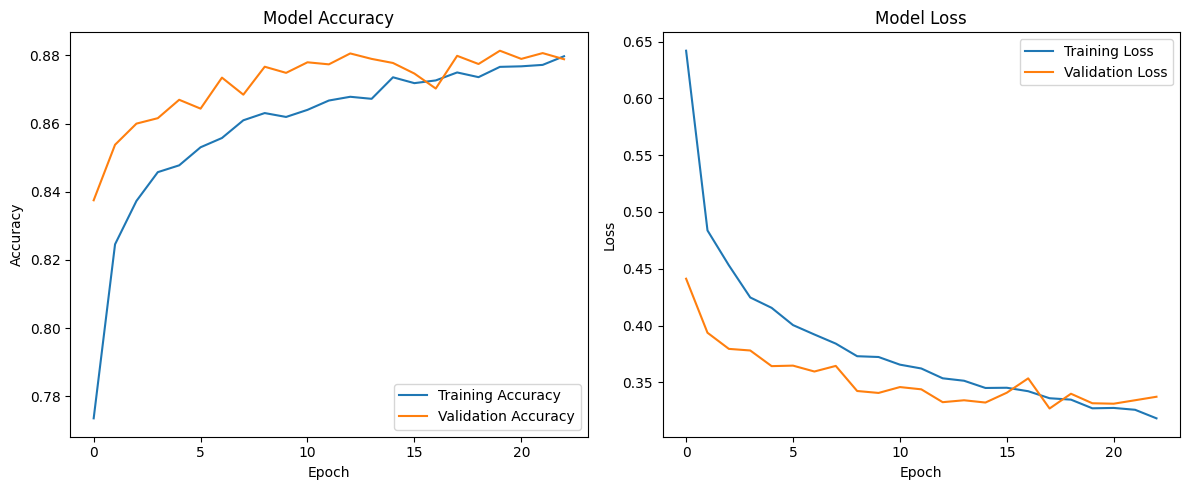

In [50]:
# Plot model
plot_model = plot_curves(history_7)

Weight Decay (L2 Regularization):

In [51]:
# Add dense layers with weight decay (L2 regularization)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')])

# Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_8.compile(optimizer=adam_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# model training
history_8 = model_8.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9002 - accuracy: 0.7636 - val_loss: 1.1935 - val_accuracy: 0.8183
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9711 - accuracy: 0.8257 - val_loss: 0.8266 - val_accuracy: 0.8235
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7375 - accuracy: 0.8349 - val_loss: 0.6823 - val_accuracy: 0.8311
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6429 - accuracy: 0.8397 - val_loss: 0.6186 - val_accuracy: 0.8373
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5971 - accuracy: 0.8426 - val_loss: 0.5874 - val_accuracy: 0.8382
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5701 - accuracy: 0.8457 - val_loss: 0.5625 - val_accuracy: 0.8421
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5531 - accuracy: 0.8474 - val_loss: 0.5565 - val_accuracy:

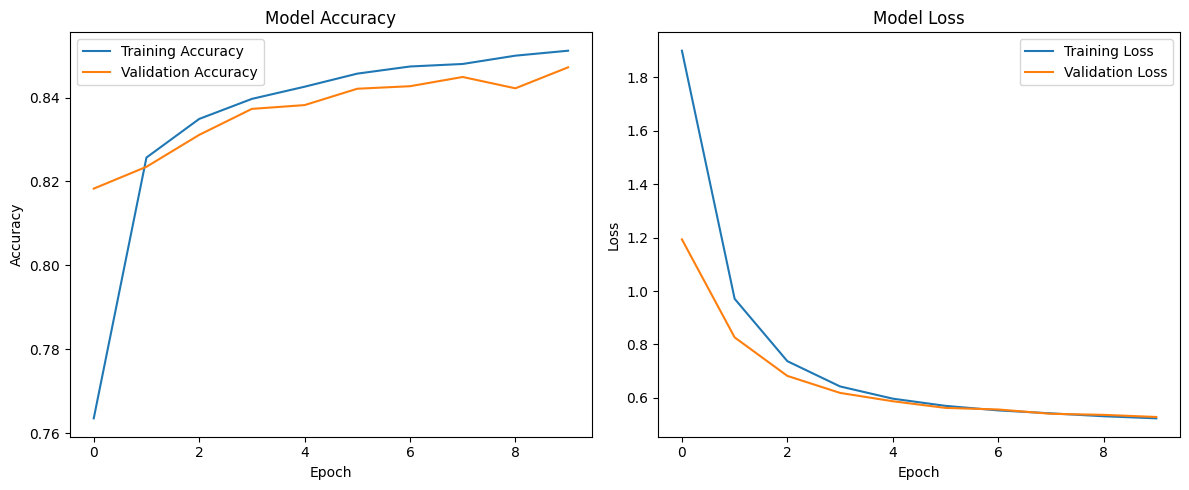

In [52]:
# Plot model
plot_curves(history_8)

## 10. Use hyperband to tune the hyperparameters learning_rate, number of layers, number of neurons in each layer, dropout rate, and learning rate decay steps. Set the max_epochs to a value slightly higher than the number of epochs you expect your model to converge, and use early stopping during training. Get the best model you can and print the corresponding hyperparameter combination for this model that you find.

In [53]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 33.4 MB/s eta 0:00:00


In [54]:
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from kerastuner import HyperModel

# Define a custom HyperModel for hyperparameter tuning
class MyHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(layers.Flatten(input_shape=self.input_shape))

        # Hyperparameters to tune
        num_layers = hp.Int('num_layers', min_value=1, max_value=5, default=2)
        num_neurons = hp.Int('num_neurons', min_value=32, max_value=256, step=32, default=128)
        dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, default=0.25)
        learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        lr_decay_steps = hp.Int('lr_decay_steps', min_value=100, max_value=1000, step=100, default=200)

        for _ in range(num_layers):
            model.add(layers.Dense(num_neurons, activation='relu'))
            model.add(layers.Dropout(dropout_rate))

        model.add(layers.Dense(self.num_classes, activation='softmax'))

        # Compile the model with hyperparameters
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        return model

# Instantiate the Hyperband tuner
tuner = Hyperband(
    hypermodel=MyHyperModel(input_shape=(28, 28), num_classes=10),
    objective='val_accuracy',
    max_epochs=5,
    factor=3,
    hyperband_iterations=2,
    directory='hyperbandtuning',
    project_name='fashionmnisthyperband'
)

# Define early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Perform hyperparameter tuning
tuner.search(train_images, train_labels,
             validation_data=(validation_images, validation_labels),
             epochs=5,
             callbacks=[early_stopping_callback])

# Get the best hyperparameters and the best model
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters.values)

Trial 20 Complete [00h 00m 38s]
val_accuracy: 0.8652999997138977

Best val_accuracy So Far: 0.8756999969482422
Total elapsed time: 00h 10m 26s
Best Hyperparameters:
{'num_layers': 1, 'num_neurons': 256, 'dropout_rate': 0.21003628493140297, 'learning_rate': 0.001, 'lr_decay_steps': 800, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0004'}


## 11. Now that you tuned your model, it is time to test it on the test images. Evaluate the model on the test images -- the TensorFlow tutorial demonstrates how to evaluate the model on the test data. What is the accuracy of your best model on the test data? (2 pts)

In [55]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels, verbose=2)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 - 1s - loss: 0.3713 - accuracy: 0.8663 - 1s/epoch - 4ms/step
Test Accuracy: 86.63%


## 12. The TensorFlow tutorial code includes a section that verifies the predictions by plotting several images in the test data together with their predictions. Modify this code in your notebook to plot the first 100 images in the test data that were incorrectly classified by your model. Can you find any systematic mistake on those examples? In particular, look at the examples where the model was most confident in its wrong predictions. (4 pts)

In [56]:
test_images.shape

(10000, 28, 28)

313/313 [==============================] - 1s 3ms/step


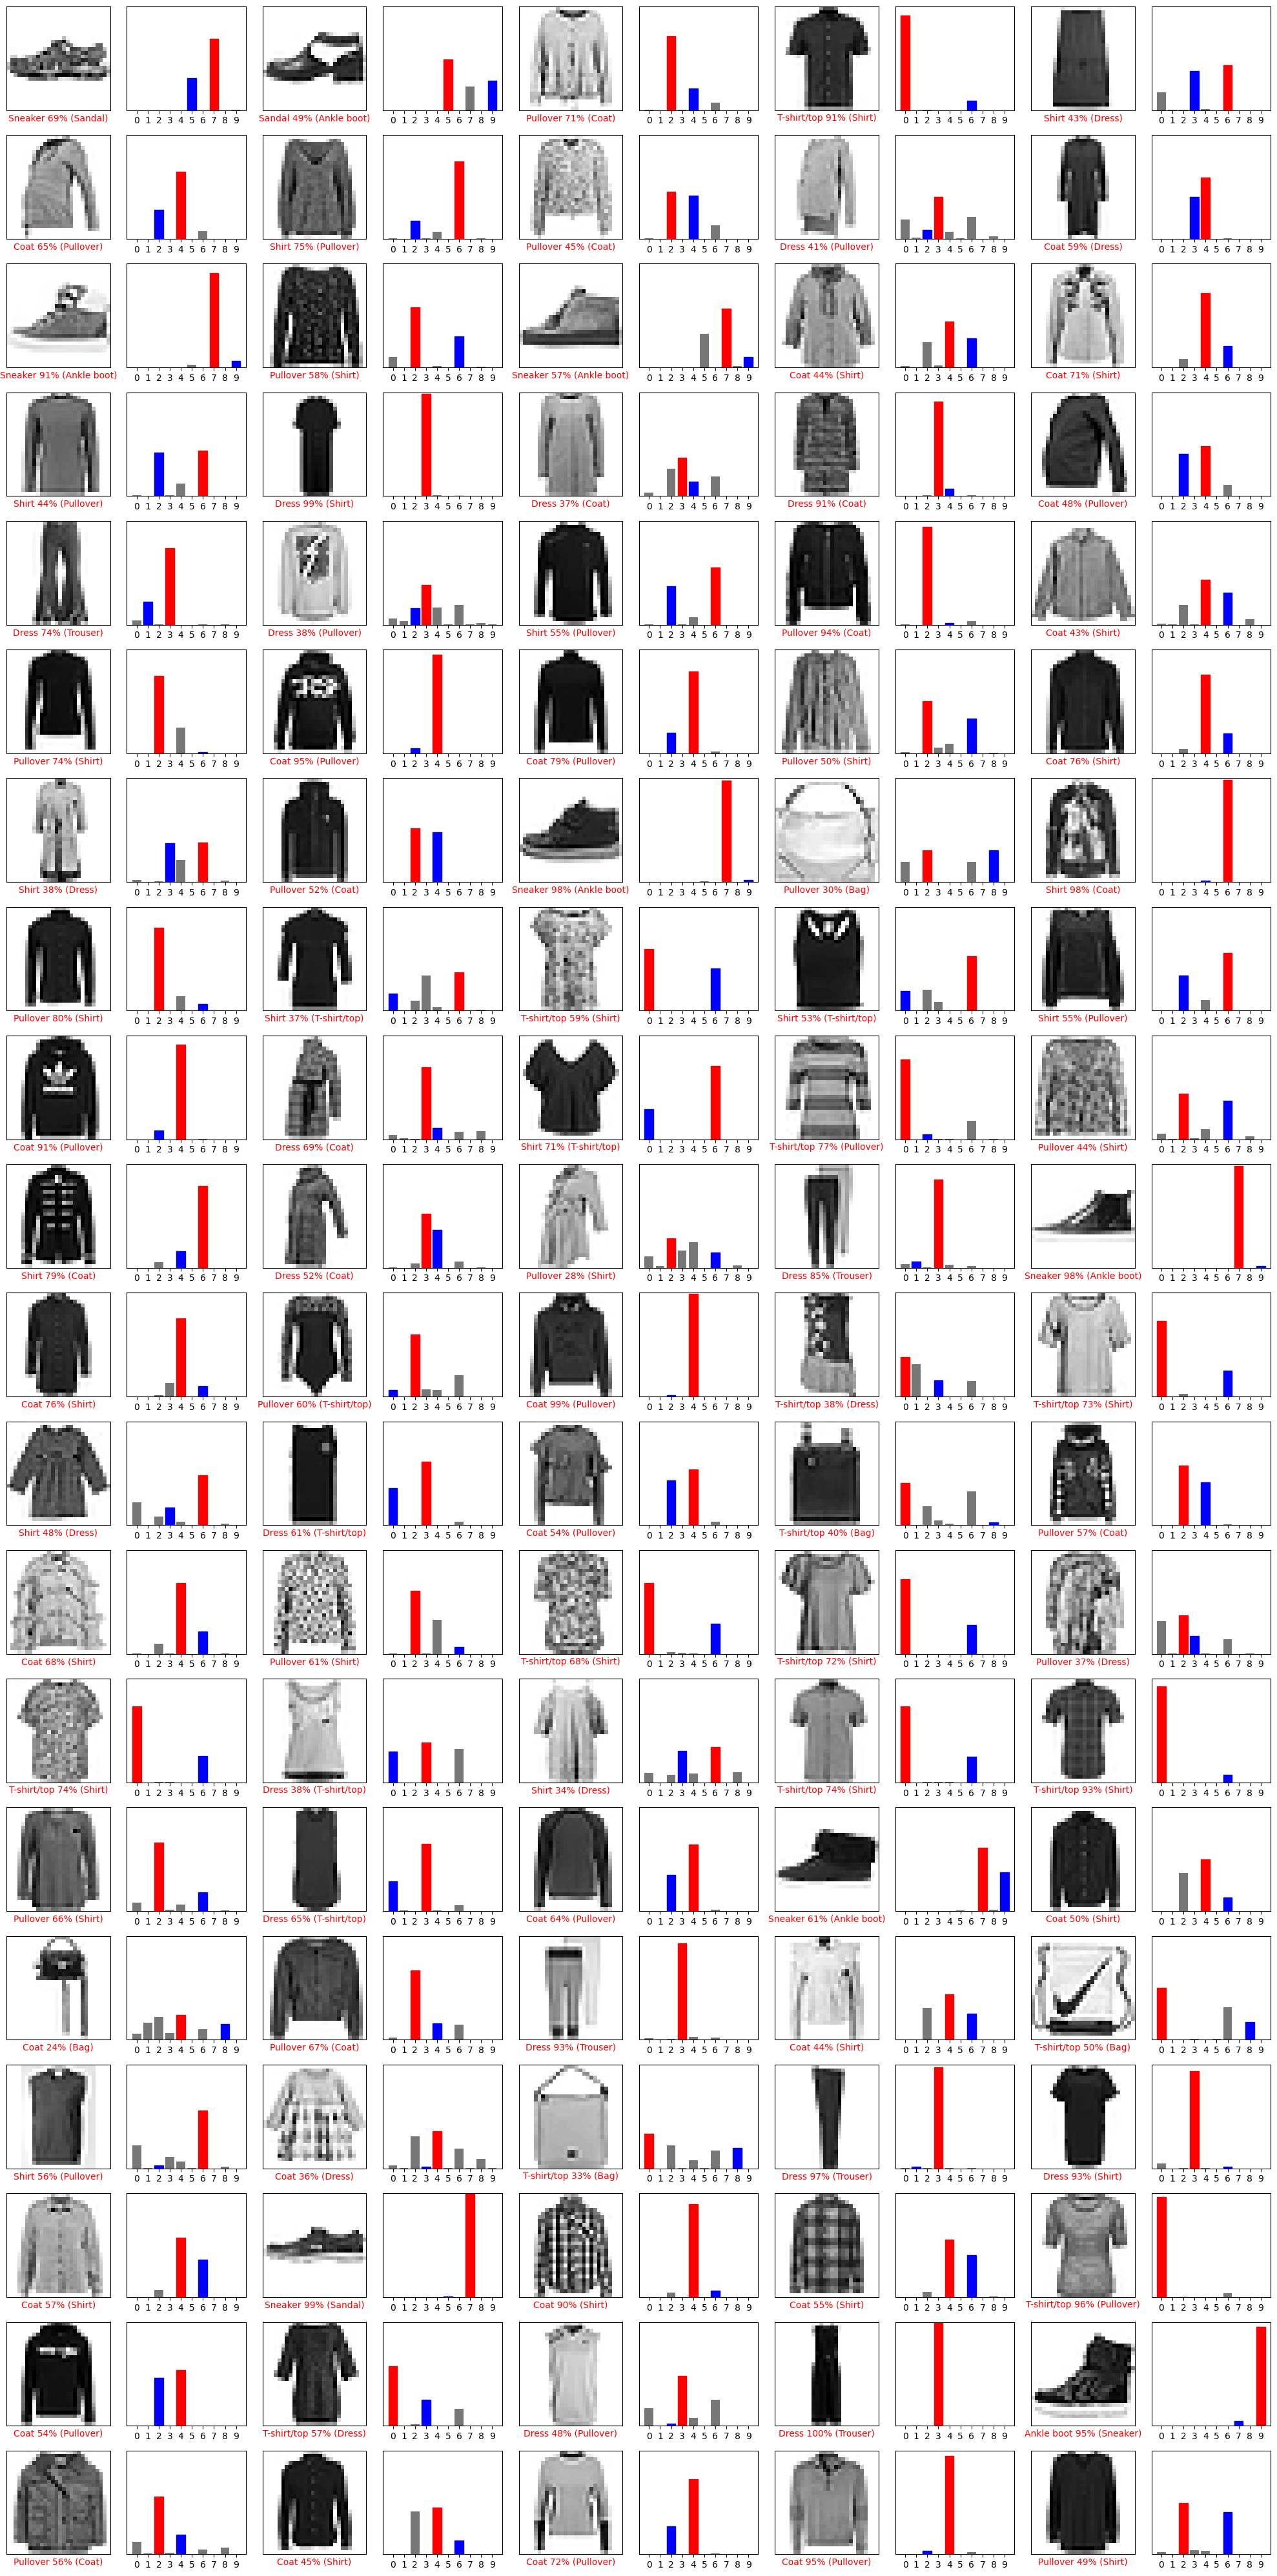

In [57]:
# Function to plot an image
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Ensure that the image has the correct shape (28, 28)
    if img.shape == (28, 28):
        plt.imshow(img, cmap=plt.cm.binary)
    else:
        # Handle cases where the image shape is (28,)
        plt.imshow(img[0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100 * np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

# Function to plot a bar chart of predicted labels
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

# Get predictions on the entire test data using model
test_predictions = best_model.predict(test_images)

# Find the indices of incorrectly classified images
incorrect_indices = np.where(np.argmax(test_predictions, axis=1) != test_labels)[0]

# Plot the first 100 incorrectly classified images
num_rows = 20
num_cols = 5
num_images = 100
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(min(num_images, len(incorrect_indices))):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(incorrect_indices[i], test_predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(incorrect_indices[i], test_predictions, test_labels)
plt.tight_layout()
plt.show()

* **Yes, it appears that there is a systematic mistake in the model's predictions for these examples. In many cases where the model was most confident in its wrong predictions, it seems to be misclassifying certain classes as others with a high degree of confidence. This suggests that there may be a confusion or similarity between these classes that the model is struggling to differentiate. Further analysis and potentially additional data or fine-tuning may be necessary to address this systematic mistake and improve the model's accuracy.**

* **Certainly, in addition to the systematic mistake, it's notable that in many cases where the model makes wrong predictions, the predicted probabilities for these incorrect classes are often low. This implies that the model is not only making mistakes but is also not particularly confident in those incorrect predictions. This could be an indication that the model is struggling to distinguish between certain classes, and the low probabilities reflect that uncertainty. Addressing this issue may require further training, adjusting model architecture, or collecting more data for the challenging classes to improve prediction confidence and accuracy.**
